# The Sparks Foundation #GRIPJUNE2021

# Data Science & Business Analytics Tasks
# BY- Akshit Bagri

## Exploratory Data Analysis - Sports(TASK 5)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

In [3]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Cleaning Dataset

In [9]:
#Removing umpire3 column from matches dataset
matches.drop(['umpire3'], axis=1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [11]:
#Replacing the teams name with their abbrevations
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions','Rising Pune Supergiant', 'Royal Challengers Bangalore',                 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',                         'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']
                ,['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DeC','KTK','PW','RPS','DC'],inplace=True)
deliveries.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions','Rising Pune Supergiant', 'Royal Challengers                             Bangalore', 'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan                      Royals', 'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi                             Capitals']
                  ,['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DeC','KTK','PW','RPS','DC'],inplace=True)

# Exploratory Data Analysis(EDA)

In [20]:
print("Total Number of Matches till 2008-2019 :", matches.shape[0])
print("\nTeams :", matches.team1.unique())
print("\nVenues :", matches.city.unique())
print("\nTotal Seasons till now :", len(matches.season.unique()))

Total Number of Matches till 2008-2019 : 756

Teams : ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DeC' 'KTK' 'PW'
 'DC']

Venues : ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

Total Seasons till now : 12


### Number of Matches each Year

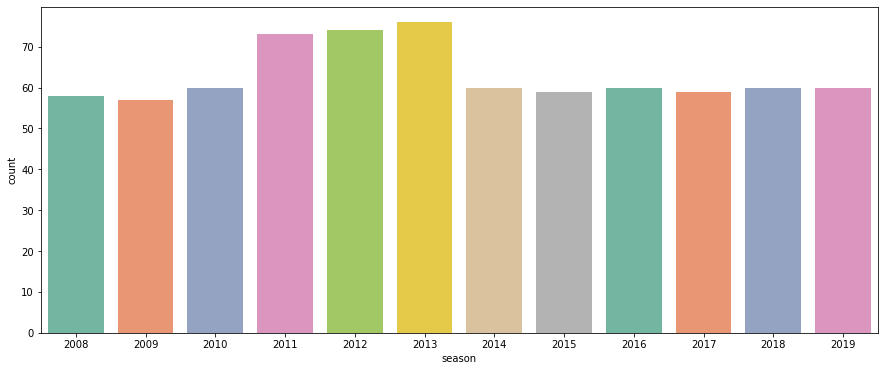

In [25]:
plt.subplots(figsize=(15,6))
sns.countplot(x='season', data=matches, palette='Set2')
plt.show()

#### According to the graph, the most matches were played in 2013.

### Number of Matches in City

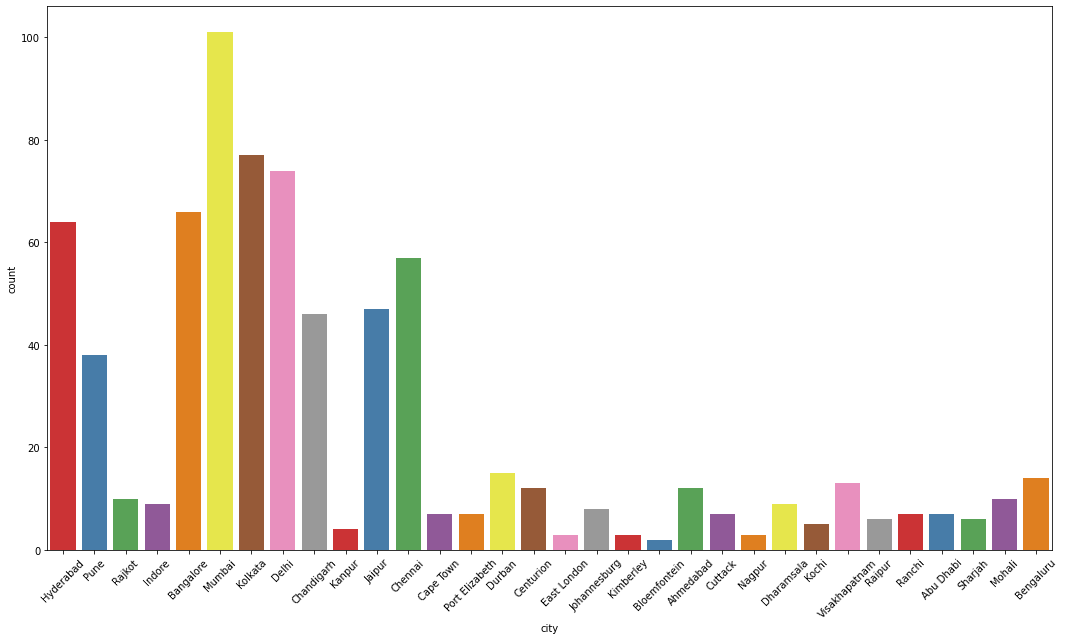

In [32]:
plt.subplots(figsize=(18,10))
sns.countplot(x='city', data=matches, palette='Set1')
plt.xticks(rotation= 45)
plt.show()

#### The graph shows that the most matches are played in Mumbai, with Kolkata and Delhi coming in second and third.

### Number of Matches Played by each team

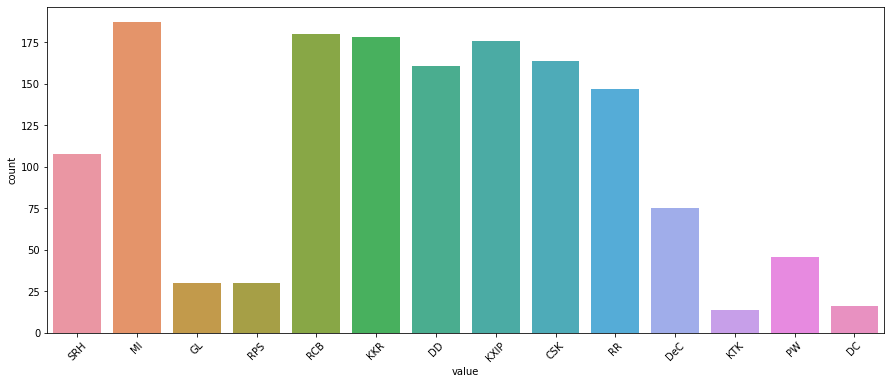

In [34]:
match_each_team = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])

plt.figure(figsize=(15,6))
sns.countplot(x='value', data=match_each_team)
plt.xticks(rotation=45)
plt.show()

#### Mumbai Indians have played the most matches, followed by Royal Challengers Bangalore.

### Toss Decisions in each season

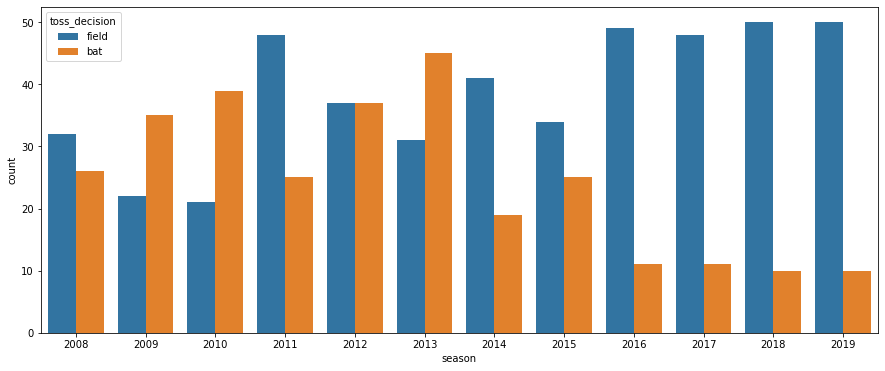

In [35]:
plt.subplots(figsize=(15,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

#### The choice between batting and fielding changes greatly between seasons. In some seasons, toss winners are more likely to choose batting, while this is not the case in others.

### Most Toss Wins by Teams

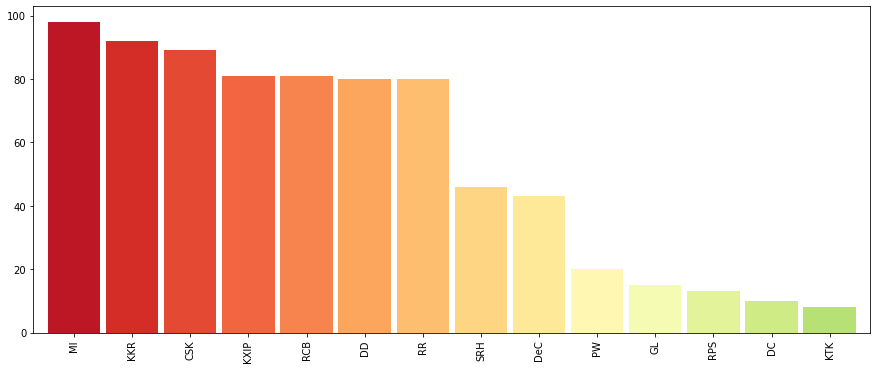

In [40]:
plt.subplots(figsize=(15,6))
matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
plt.show()

#### Mumbai Indians seemed to be extremely fortunate, having won the most tosses, followed by Kolkata Knight Riders. Kochi Tuskers Kerala have the fewest victories since they have played the fewest games.

### Is the winner of the coin toss also the winner of the match?

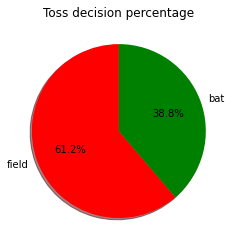

In [61]:
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['r', 'g']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Number of Wins per Teams

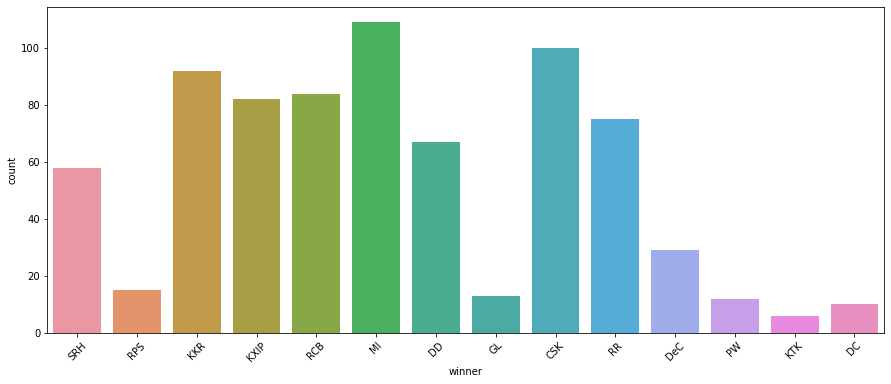

In [45]:
plt.subplots(figsize=(15,6))
sns.countplot(x='winner', data=matches)
plt.xticks(rotation= 45)
plt.show()

#### Mumbai Indians Leads the pack, followed by Chennai Super Kings

### Winner of Each Season

In [52]:
winner_season = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
winner_season = winner_season.groupby('season')
winner_season.first()

,winner
season,
2008,RR
2009,DeC
2010,CSK
2011,CSK
2012,KKR
2013,MI
2014,KKR
2015,MI
2016,SRH


### Runs Over the Seasons

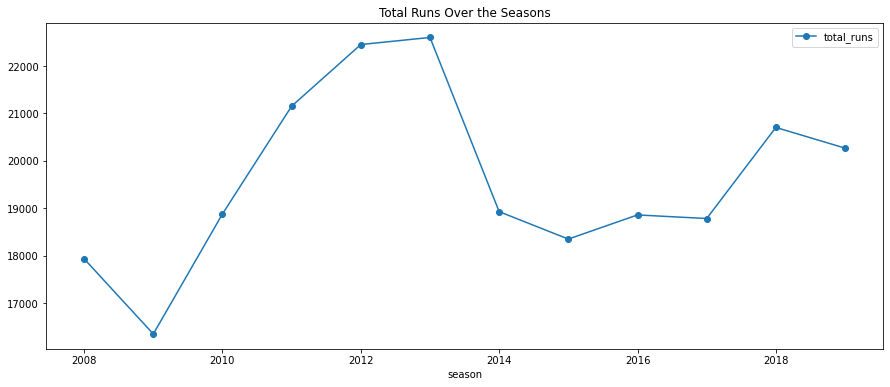

In [63]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')
plt.gcf().set_size_inches(15,6)
plt.title('Total Runs Over the Seasons')
plt.show()

### Sixes and Fours Over the Season

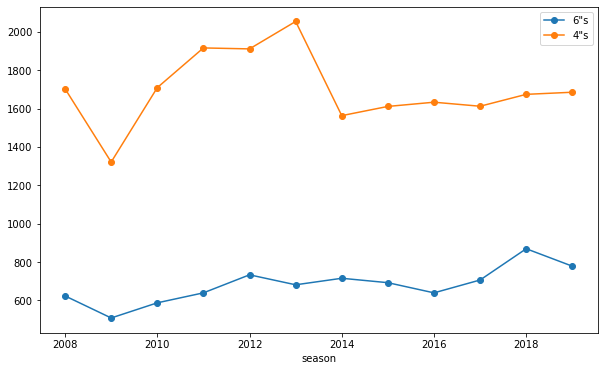

In [64]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

#### Between 2008 and 2009, there was a decrease in total runs and sixes. However, after that, there was a significant increase in runs in every season until 2013, but then there was a drop in total runs and total sixes the next season.

### Top 10 Players of the Match

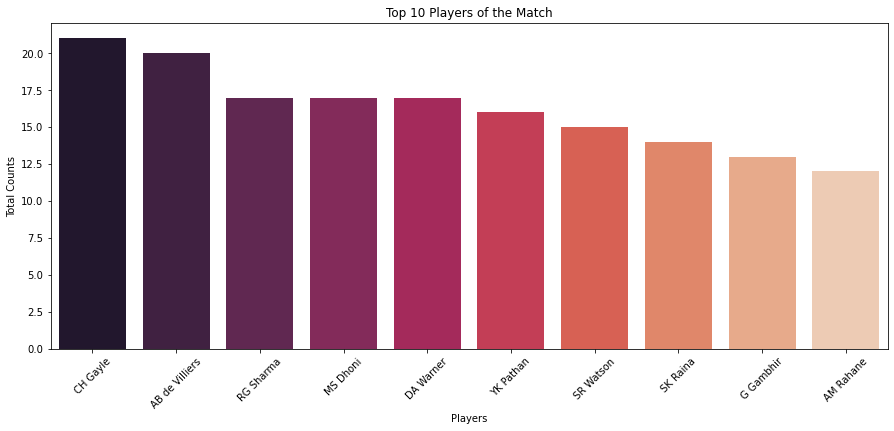

In [70]:
plt.subplots(figsize=(15,6))
player_match = matches.player_of_match.value_counts()[:10].reset_index()
player_match.columns = ['Players', 'Total Counts']
sns.barplot(x=player_match.Players, y=player_match['Total Counts'], palette='rocket')
plt.xticks(rotation=45)
plt.title('Top 10 Players of the Match')
plt.show()

#### Ch Gayle has earned the Player of the Match award the most times in the last 12 seasons, with AB de Villers finishing in second.

### Most Number of Runs

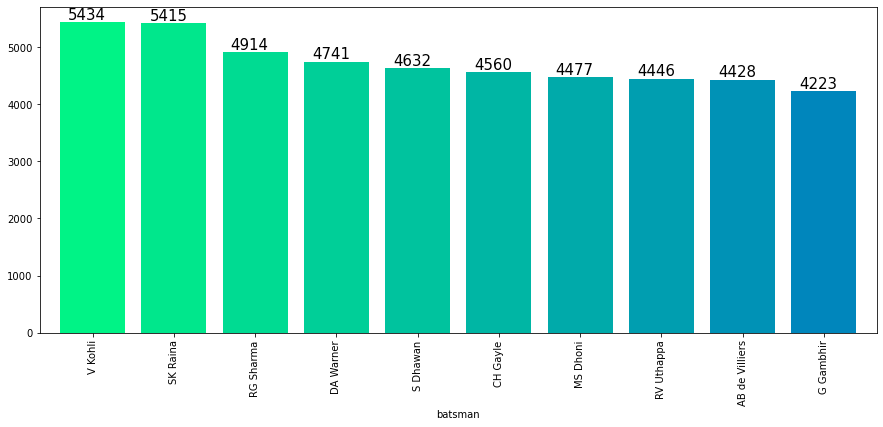

In [76]:
plt.subplots(figsize=(15,6))
max_runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('winter_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

#### V Kholi has the record for the most runs in these years. SK Raina is in second place by a mere 19 runs gap.

### Most Number of Wickets

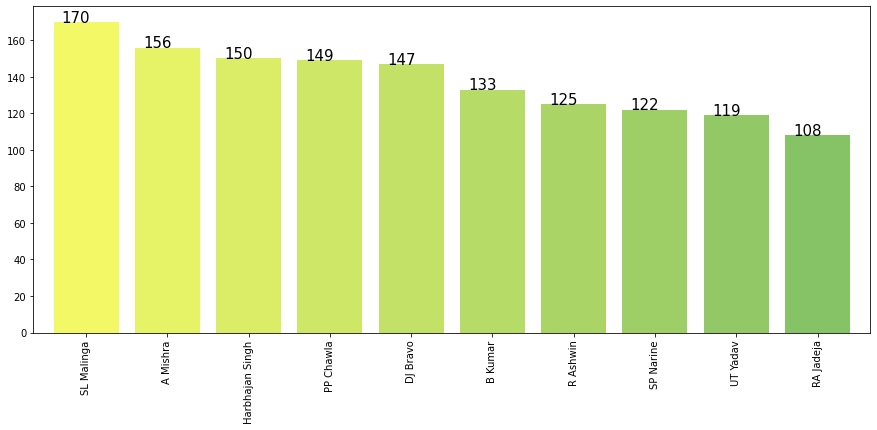

In [78]:
plt.subplots(figsize=(15,6))
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color=sns.color_palette('summer_r',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()),fontsize=15)
plt.show()

#### In these years, SL Malinga holds the record for most wickets. A Mishra is in second place with a 14-wicket gap.